# Usamos data augmentation

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
base_dir = 'Data\\DogsCats'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [32]:
validation_dir

'Data\\DogsCats\\validation'

In [72]:
datagen = ImageDataGenerator(rotation_range=40,# valor entre 0 y 180 que harà rotar de forma random las imagenes
                             width_shift_range=0.2, # transladar la imagen horizontalmente
                             height_shift_range=0.2,# transladar la imagen verticalmente
                             shear_range=3, # sharing transformations (aplicaciones lineales)
                             zoom_range=0.2, # hacer zoom a la imagen
                             horizontal_flip=True, # hacer el espejo
                             fill_mode='nearest') # la forma de rellenar los pixeles que quedan vacios tras las transformaciones


In [73]:
os.path.join(train_dir, 'cats')

'Data\\DogsCats\\train\\cats'

In [74]:
train_cats_dir = os.path.join(train_dir, 'cats') # directorio de los gatos
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [75]:
fnames[0:5]

['Data\\DogsCats\\train\\cats\\cat.0.jpg',
 'Data\\DogsCats\\train\\cats\\cat.1.jpg',
 'Data\\DogsCats\\train\\cats\\cat.10.jpg',
 'Data\\DogsCats\\train\\cats\\cat.100.jpg',
 'Data\\DogsCats\\train\\cats\\cat.101.jpg']

In [76]:
img_path = fnames[19]
print(img_path)
# leemos la imagen i le cambiamos el tamaño
img = load_img(img_path, target_size = (300, 300))

# convertimos la imagen en un numpy array
x = img_to_array(img)
print(x.shape)
#Reshapes it to (1, 100, 100, 3)
x = x.reshape((1,) + x.shape)
print(x.shape)


Data\DogsCats\train\cats\cat.115.jpg
(300, 300, 3)
(1, 300, 300, 3)


(1, 300, 300, 3)
(1, 300, 300, 3)
(1, 300, 300, 3)
(1, 300, 300, 3)


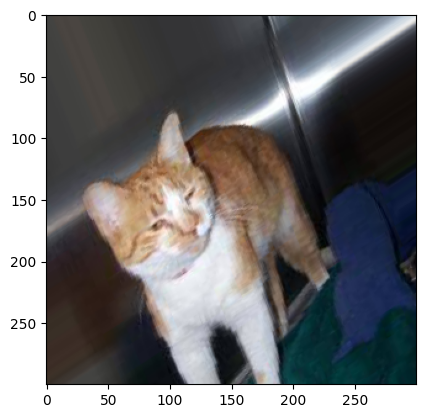

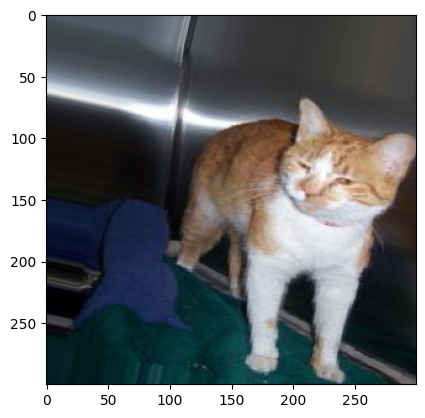

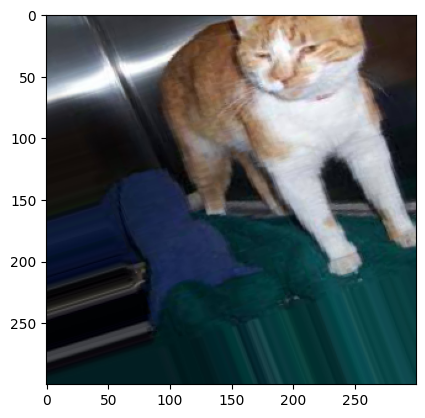

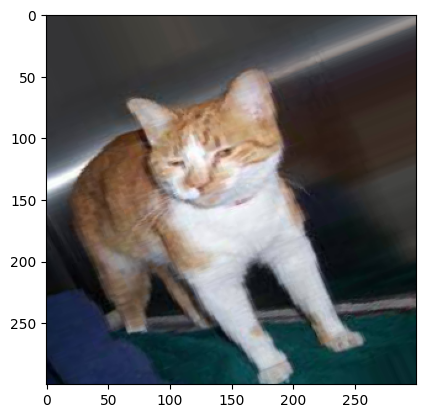

In [77]:
i=0
# datagen.flow es un iterador que genera imagenes de forma indefinida, por lo tanto hayq ue hacer un break
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    print(batch.shape)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [87]:
from keras import models, layers
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding="valid", activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 98, 98, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 47, 47, 64)       256       
 hNormalization)                                                 
                                                      

In [89]:
# usando ImageDataGenerator podemos reescalar en el camino
train_datagen = ImageDataGenerator( 
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, # path # (X,Y) # train_dir => hay dos carpetas (cats y dogs)
    target_size=(100, 100), # porque en la red he puesto que el input size sea 100x100
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [90]:
train_dir

'Data\\DogsCats\\train'

In [11]:
train_generator

In [95]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [93]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [96]:
history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=10,
    shuffle=True,
    validation_data=validation_generator,
    validation_steps=10)

Epoch 1/10
30/30 [==============================] - 13s 395ms/step - loss: 0.9664 - accuracy: 0.5583 - val_loss: 0.6934 - val_accuracy: 0.4950
Epoch 2/10
30/30 [==============================] - 11s 374ms/step - loss: 0.7483 - accuracy: 0.5900 - val_loss: 0.6869 - val_accuracy: 0.5700
Epoch 3/10
30/30 [==============================] - 10s 339ms/step - loss: 0.6700 - accuracy: 0.6367 - val_loss: 0.6785 - val_accuracy: 0.6000
Epoch 4/10
30/30 [==============================] - 12s 390ms/step - loss: 0.7176 - accuracy: 0.5933 - val_loss: 0.6851 - val_accuracy: 0.5300
Epoch 5/10
30/30 [==============================] - 11s 346ms/step - loss: 0.6699 - accuracy: 0.6067 - val_loss: 0.6995 - val_accuracy: 0.5150
Epoch 6/10
30/30 [==============================] - 11s 360ms/step - loss: 0.6566 - accuracy: 0.6567 - val_loss: 0.6897 - val_accuracy: 0.5100
Epoch 7/10
30/30 [==============================] - 10s 342ms/step - loss: 0.6352 - accuracy: 0.6300 - val_loss: 0.8419 - val_accuracy: 0.4750

## Using a pretrained convnet
Podemos utilizar redes ya entrenadas para utilizarlas en nuestra red

Las capas intermedias de estas redes han aprendido a sacar "features" de otros datasets y nos pueden ser utiles para generar features para un fin diferente.



### Using the trained
Una red neuronal convolucional suele ser una red de convoluciones y max_pooling, seguida de dense layers para classificar. La primera parte desarrola las features y la segunda las utiliza para clasificar

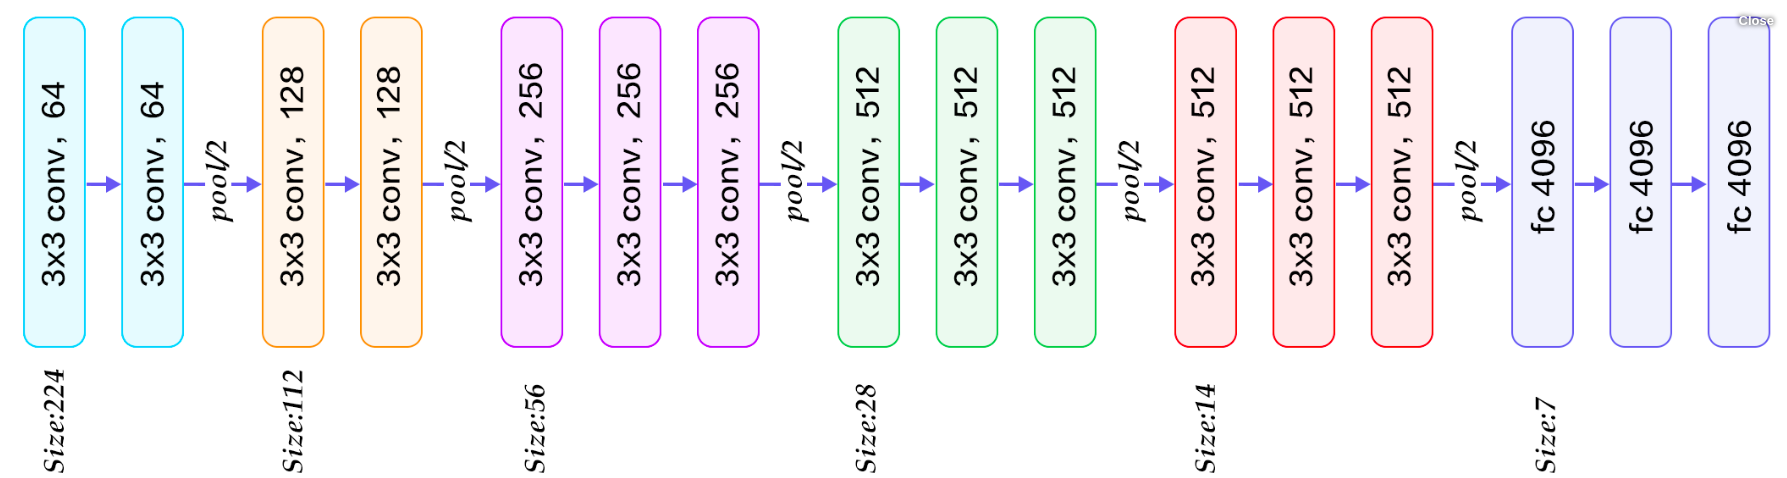


In [100]:
conv_base = tf.keras.applications.VGG16(weights = 'imagenet', #de que dataset se escogen los pesos para inicializar el modelo
                                        include_top = False, # si se incluye la parte "densa" del modelo 
                                        input_shape=(100, 100, 3)) #El input condiciona los parametros
print(conv_base.summary()) #Line 2

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

## Añadimos la parte densa

In [101]:
from keras import models 
from keras import layers
model = models.Sequential()
model.add(conv_base) # aqui añado toda la red convolucional de VGG16
model.add(layers.Flatten())
# vector
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               1179904   
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 15,894,849
Trainable params: 15,894,849
Non-trainable params: 0
_________________________________________________________________


Antes de entrenar la red neuronal, debemos "congelar" la base convolucional

In [103]:
print('Numero de parametros/layers (w+b) entrenables: ', len(model.trainable_weights))
conv_base.trainable = False
print('Numero de parametros/layers(w+b) entrenables: ', len(model.trainable_weights))

Numero de parametros/layers (w+b) entrenables:  30
Numero de parametros/layers(w+b) entrenables:  4


In [104]:
dense_layer = model.get_layer("dense_12")


In [21]:
dense_layer

In [23]:
dense_layer.trainable=True
# asi podemos alterar si una capa es entrenable o no

In [24]:
# layer_conv=conv_base.get_layer('block5_conv3') podria no congelar los ultimos layers de la parte convolucional

El numero de parametros corresponde a el numero de matrices y el numero de vectores independientes de la función de activación

In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               1179904   
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 15,894,849
Trainable params: 1,180,161
Non-trainable params: 14,714,688
_________________________________________________________________


### Añadimos los generadores de datos

In [106]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [107]:
history = model.fit(train_generator,
                      steps_per_epoch=50,
                      epochs=10,
                      shuffle=True,
                      validation_data=validation_generator,
                      validation_steps=20)

Epoch 1/10
50/50 [==============================] - 33s 648ms/step - loss: 0.6709 - accuracy: 0.5850 - val_loss: 0.6335 - val_accuracy: 0.5825
Epoch 2/10
50/50 [==============================] - 34s 687ms/step - loss: 0.6024 - accuracy: 0.6830 - val_loss: 0.5411 - val_accuracy: 0.7625
Epoch 3/10
50/50 [==============================] - 34s 679ms/step - loss: 0.5693 - accuracy: 0.6920 - val_loss: 0.4866 - val_accuracy: 0.8325
Epoch 4/10
50/50 [==============================] - 33s 668ms/step - loss: 0.5405 - accuracy: 0.7300 - val_loss: 0.4930 - val_accuracy: 0.7850
Epoch 5/10
50/50 [==============================] - 33s 663ms/step - loss: 0.5257 - accuracy: 0.7590 - val_loss: 0.4575 - val_accuracy: 0.8125
Epoch 6/10
50/50 [==============================] - 32s 635ms/step - loss: 0.5032 - accuracy: 0.7550 - val_loss: 0.4584 - val_accuracy: 0.7925
Epoch 7/10
50/50 [==============================] - 35s 713ms/step - loss: 0.4812 - accuracy: 0.7710 - val_loss: 0.4225 - val_accuracy: 0.8300

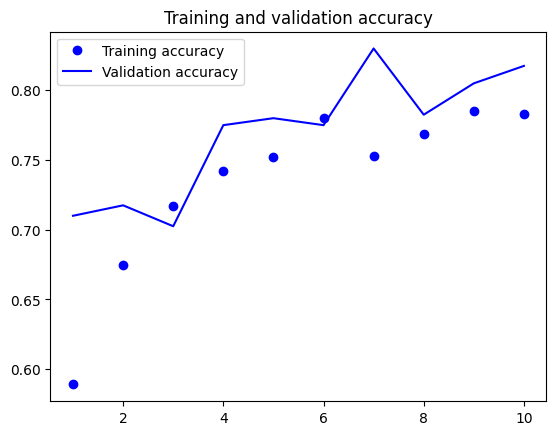

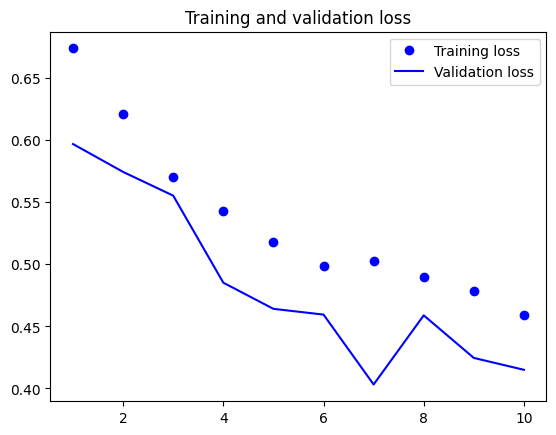

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# para buscar redes preentrenadas
# keras/tensorflow (pretrained convolutional network)
# hunningFace

# 1. Al ejercicio de Cactus, añadir generadores
### Directamente desde el nummpy array
### Añadis VGG16 en la convolucional

# 2. Transformar el sistema de carpetas de Cactus a Train y Test
### 1º leer train_cactus.csv => dividir en train y test (split)
### 2º crear las carpetas y transferir automaticamente las imagenes
### paquete os y shutil
### Añadis generadores desde el directorio (forma 2)

